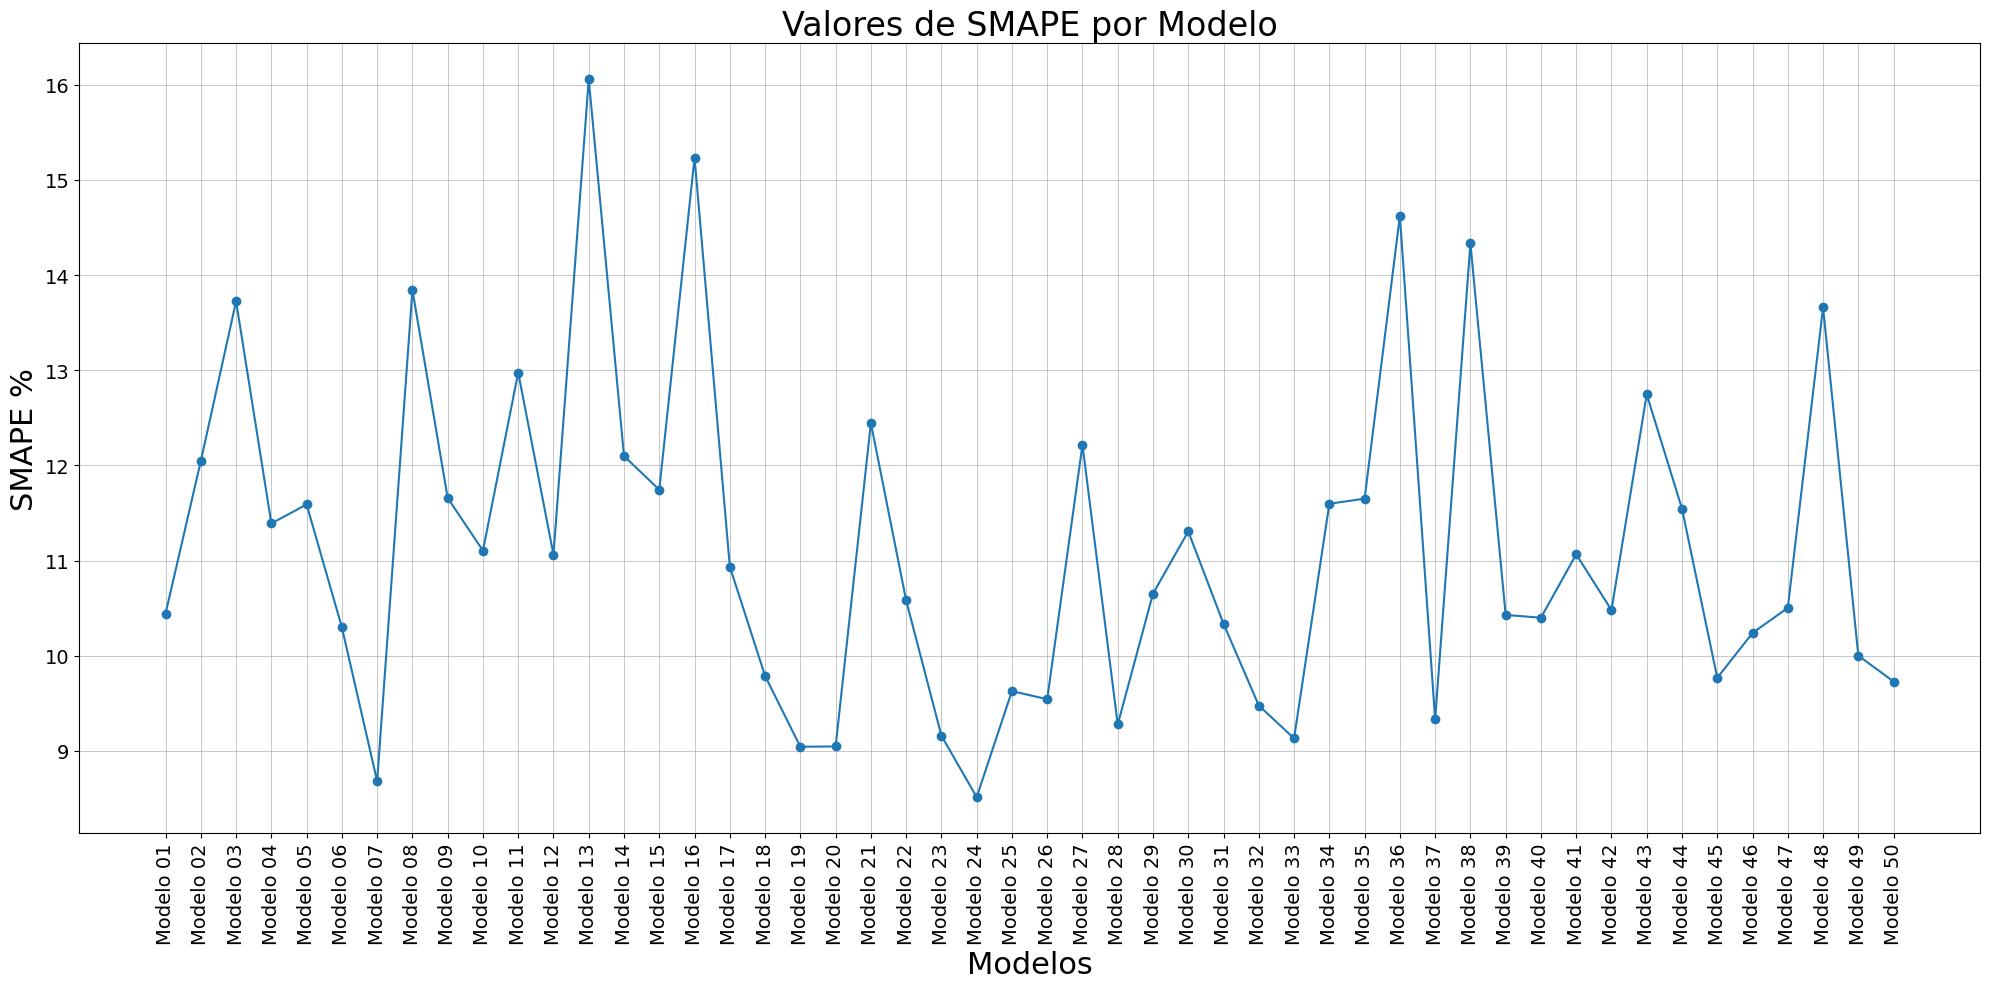

In [1]:
import matplotlib.pyplot as plt

# Values and model names
values = [
    10.443473607301712, 12.046072632074356, 13.724647462368011, 11.390585452318192, 
    11.589843034744263, 10.298652201890945, 8.682016283273697, 13.843271136283875, 
    11.657586693763733, 11.104786396026611, 12.976239621639252, 11.061488091945648, 
    16.057905554771423, 12.098102271556854, 11.7450512945652, 15.233336389064789, 
    10.936948657035828, 9.788070619106293, 9.044242650270462, 9.047288447618484, 
    12.445323914289474, 10.581115633249283, 9.160233289003372, 8.51520225405693, 
    9.628905355930328, 9.543521702289581, 12.21686601638794, 9.278048574924469, 
    10.65315157175064, 11.306295543909073, 10.335564613342285, 9.477295726537704, 
    9.13158729672432, 11.597343534231186, 11.650410294532776, 14.621423184871674, 
    9.330389648675919, 14.332292973995209, 10.429208725690842, 10.39963886141777, 
    11.066092550754547, 10.47990694642067, 12.745872139930725, 11.545101553201675, 
    9.767688065767288, 10.2395698428154, 10.503224283456802, 13.66058886051178, 
    10.001124441623688, 9.728950262069702
]
models = [f"Modelo {i:02d}" for i in range(1, 51)]

# Creating the plot with increased font sizes
plt.figure(figsize=(20, 10))
plt.plot(models, values, marker='o', linestyle='-')

# Setting the labels, title, and tick labels with larger font sizes
plt.xlabel('Modelos', fontsize=22)
plt.ylabel('SMAPE %', fontsize=22)
plt.title('Valores de SMAPE por Modelo', fontsize=24)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=14)

plt.grid(True, which='both', linestyle='-', linewidth=0.5)

# Adjust layout to fit everything
plt.tight_layout()

plt.savefig('smape_evolution_optuna.png', format='png', dpi=300)

plt.show()

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Extracted parameter values for all 50 models
models = list(range(1, 51))
days_in = [22, 19, 15, 29, 15, 22, 19, 27, 23, 27, 18, 22, 19, 24, 17, 21, 26, 20, 20, 17, 24, 17, 14, 17, 20, 16, 19, 18, 20, 21, 14, 17, 18, 16, 16, 19, 15, 21, 18, 17, 15, 18, 19, 18, 20, 16, 19, 23, 17, 21]
days_out = [1] * 50  # All values are 1, omitted for brevity
hidden_size = [42, 57, 32, 56, 54, 38, 46, 57, 62, 58, 48, 39, 43, 35, 48, 44, 38, 51, 50, 48, 52, 46, 51, 46, 44, 40, 50, 45, 64, 41, 54, 47, 50, 48, 42, 53, 46, 49, 55, 58, 46, 50, 49, 52, 43, 47, 32, 56, 50, 44]
lstm_layers = [2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
num_attention_heads = [4, 3, 2, 3, 4, 3, 3, 3, 2, 4, 2, 3, 3, 3, 4, 2, 3, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 4, 4, 3, 4, 4, 2, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 4]
dropout = [0.2812, 0.1427, 0.3212, 0.0911, 0.2431, 0.3725, 0.3505, 0.1383, 0.0937, 0.0096, 0.3817, 0.3963, 0.3352, 0.3318, 0.2399, 0.3999, 0.3026, 0.3647, 0.2681, 0.2693, 0.2303, 0.2853, 0.2696, 0.3319, 0.3460, 0.3068, 0.3569, 0.3180, 0.3507, 0.2828, 0.3190, 0.2619, 0.2872, 0.2094, 0.3000, 0.2626, 0.3301, 0.2096, 0.2560, 0.3498, 0.3731, 0.2801, 0.2954, 0.3158, 0.2897, 0.2290, 0.3350, 0.3863, 0.2476, 0.1862]
batch_size = [30, 20, 30, 29, 22, 27, 24, 19, 29, 27, 24, 16, 26, 25, 32, 23, 27, 21, 21, 17, 19, 17, 18, 22, 22, 24, 21, 23, 25, 20, 22, 16, 18, 20, 23, 21, 19, 17, 26, 25, 20, 18, 18, 17, 22, 16, 19, 24, 21, 18]

In [3]:
from matplotlib import rcParams

# 2. Configure plot styles
# rcParams["savefig.dpi"] = 300
# rcParams["figure.dpi"] = 300
# rcParams["font.size"] = 16
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"

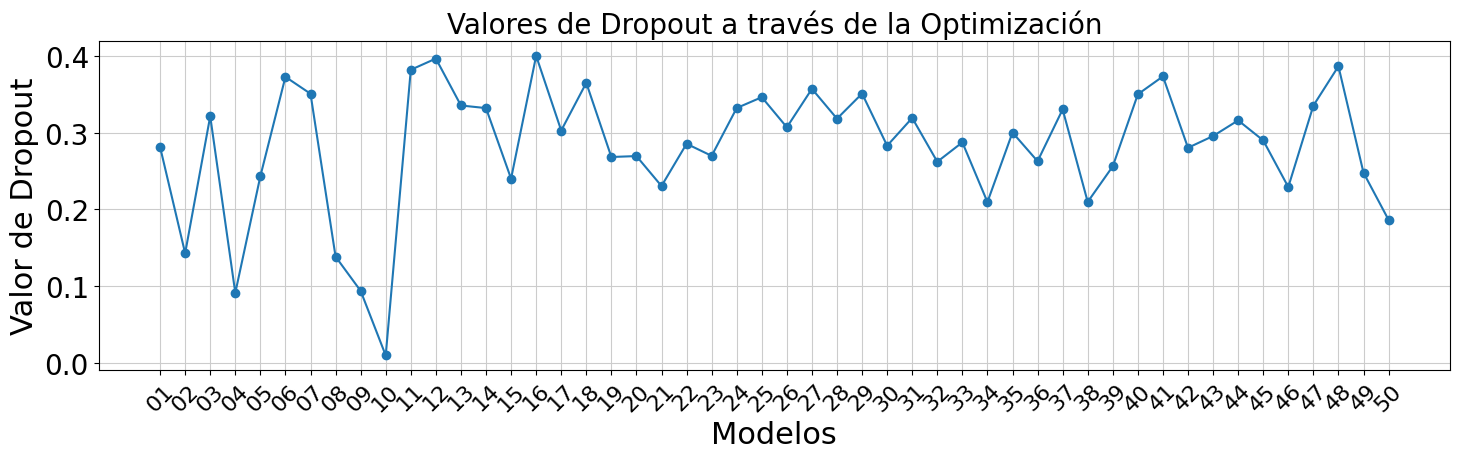

In [4]:
# Creating a plot for dropout values
plt.figure(figsize=(15, 5))
plt.plot(models, dropout, marker='o')
# plt.plot(models, values, marker='o')
plt.title("Valores de Dropout a través de la Optimización")
plt.xlabel("Modelos")
plt.ylabel("Valor de Dropout")
plt.xticks(models, labels=[f'{i:02d}' for i in models], rotation=45)
plt.grid(True)


# Adjust layout to fit everything
plt.tight_layout()

plt.savefig('dropout_evol_optuna.png', format='png', dpi=300)

plt.show()

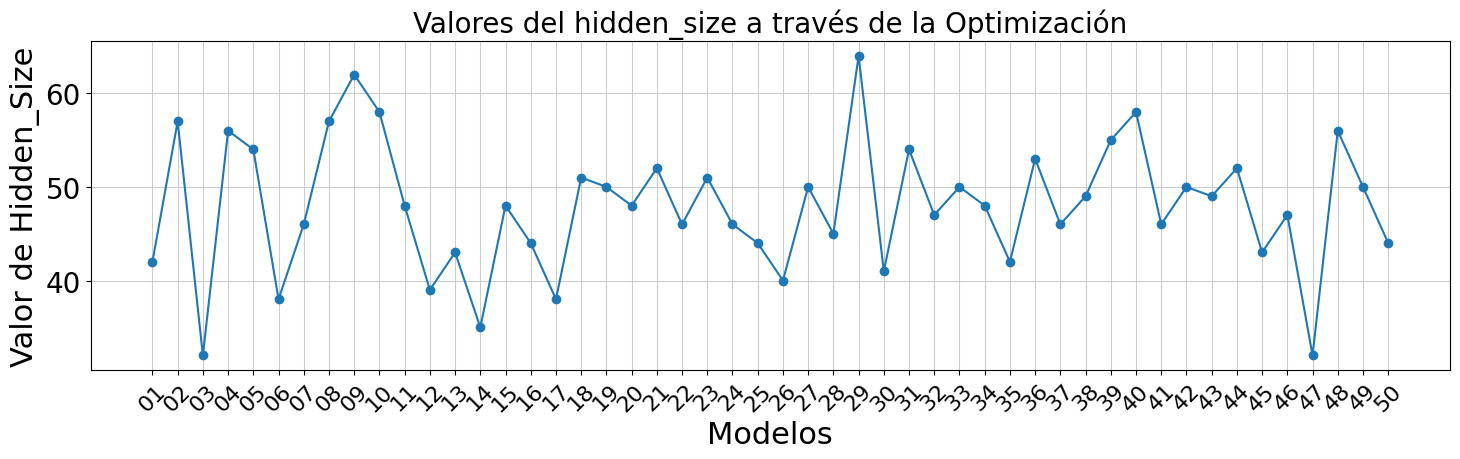

In [5]:
# Creating a plot for dropout values
plt.figure(figsize=(15, 5))
plt.plot(models, hidden_size, marker='o')
# plt.plot(models, values, marker='o')
plt.title("Valores del hidden_size a través de la Optimización")
plt.xlabel("Modelos")
plt.ylabel("Valor de Hidden_Size")
plt.xticks(models, labels=[f'{i:02d}' for i in models], rotation=45)
plt.grid(True)


# Adjust layout to fit everything
plt.tight_layout()

plt.savefig('hidden_size_evol_optuna.png', format='png', dpi=300)

plt.show()

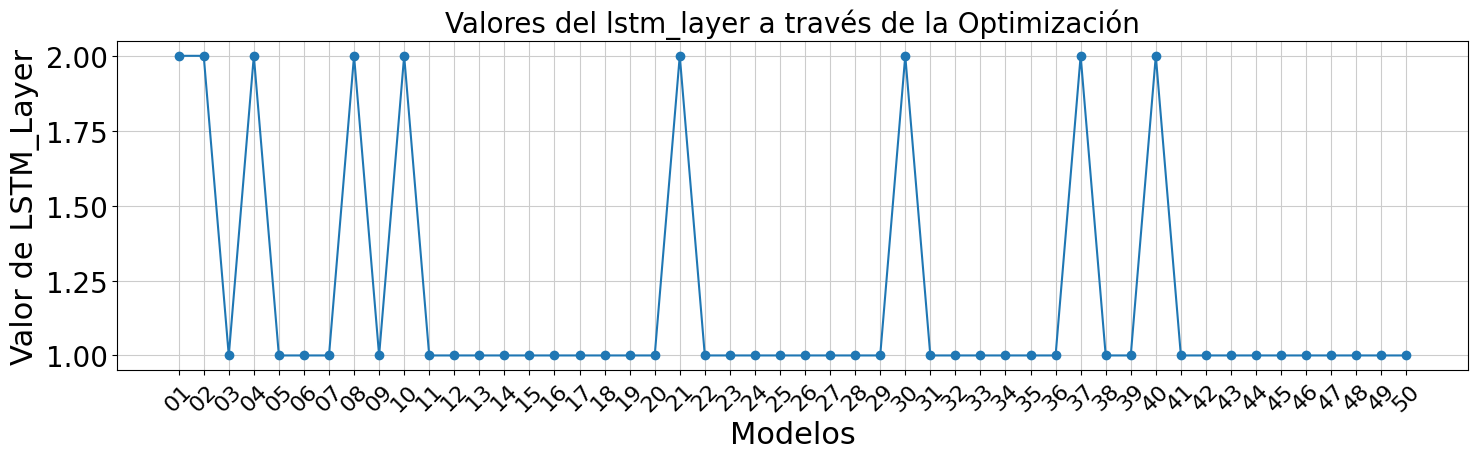

In [8]:
# Creating a plot for dropout values
plt.figure(figsize=(15, 5))
plt.plot(models, lstm_layers, marker='o')
# plt.plot(models, values, marker='o')
plt.title("Valores del lstm_layer a través de la Optimización")
plt.xlabel("Modelos")
plt.ylabel("Valor de LSTM_Layer")
plt.xticks(models, labels=[f'{i:02d}' for i in models], rotation=45)
plt.grid(True)


# Adjust layout to fit everything
plt.tight_layout()

plt.savefig('lstm_layer_evol_optuna.png', format='png', dpi=300)

plt.show()

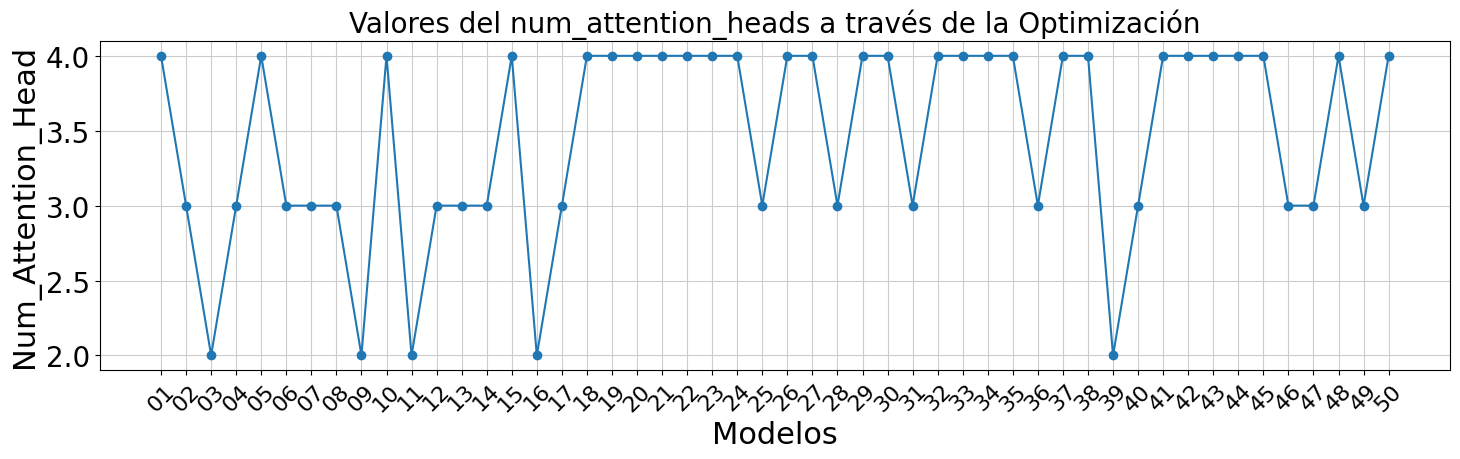

In [10]:
# Creating a plot for dropout values
plt.figure(figsize=(15, 5))
plt.plot(models, num_attention_heads, marker='o')
# plt.plot(models, values, marker='o')
plt.title("Valores del num_attention_heads a través de la Optimización")
plt.xlabel("Modelos")
plt.ylabel("Num_Attention_Head")
plt.xticks(models, labels=[f'{i:02d}' for i in models], rotation=45)
plt.grid(True)


# Adjust layout to fit everything
plt.tight_layout()

plt.savefig('num_heads_evol_optuna.png', format='png', dpi=300)

plt.show()

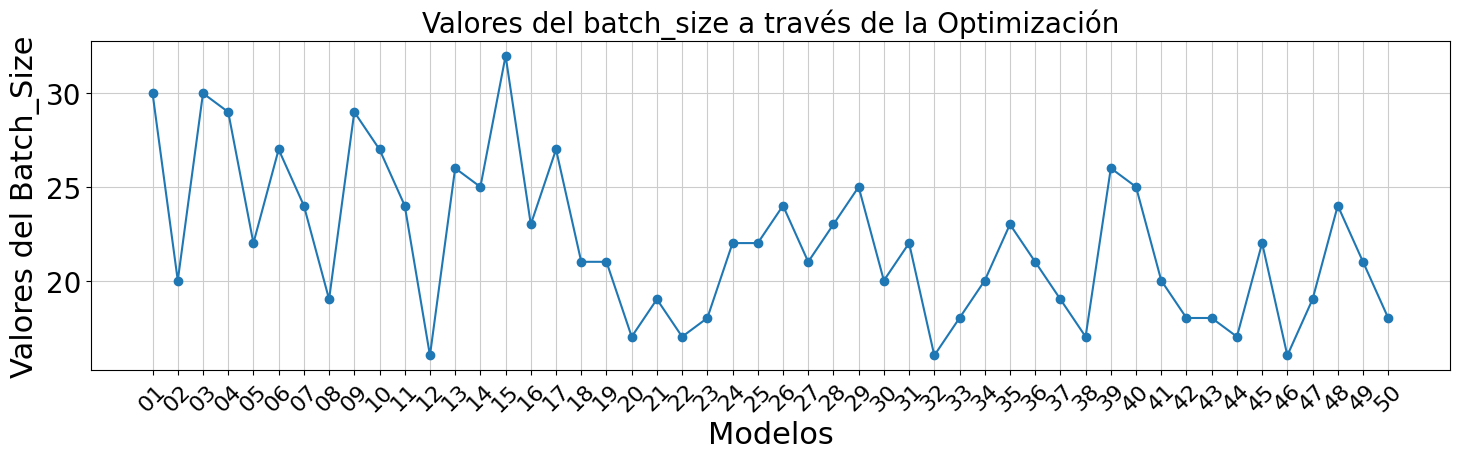

In [11]:
# Creating a plot for dropout values
plt.figure(figsize=(15, 5))
plt.plot(models, batch_size, marker='o')
# plt.plot(models, values, marker='o')
plt.title("Valores del batch_size a través de la Optimización")
plt.xlabel("Modelos")
plt.ylabel("Valores del Batch_Size")
plt.xticks(models, labels=[f'{i:02d}' for i in models], rotation=45)
plt.grid(True)


# Adjust layout to fit everything
plt.tight_layout()

plt.savefig('batch_size_evol_optuna.png', format='png', dpi=300)

plt.show()

NameError: name 'top_10_params_df' is not defined

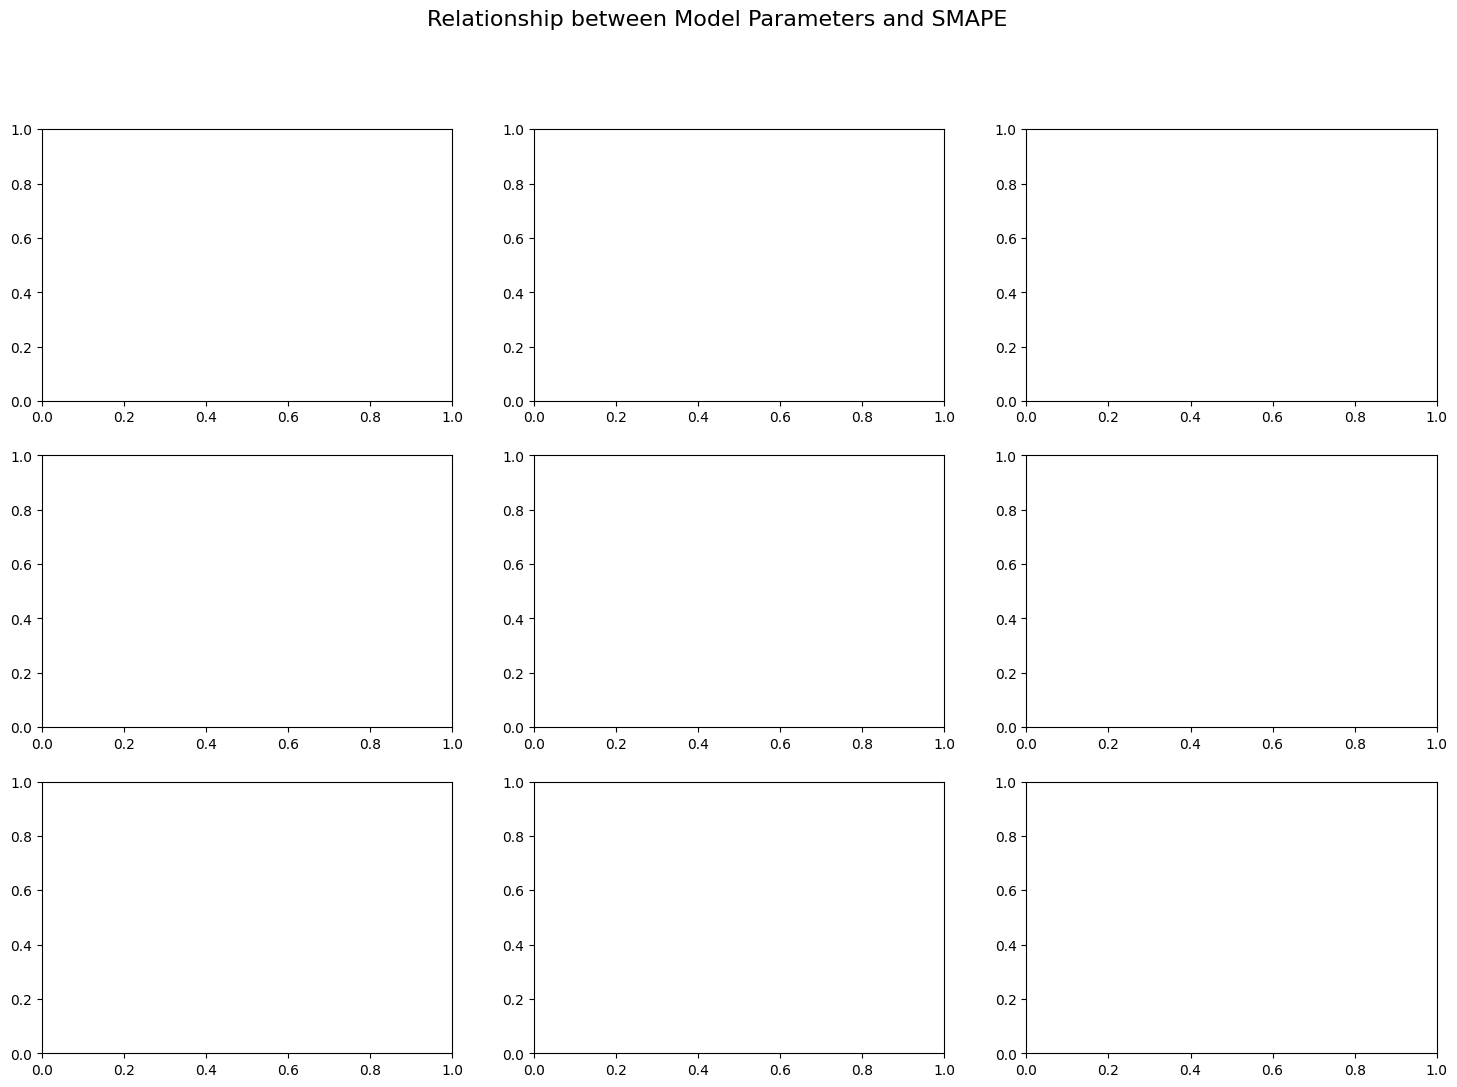

In [1]:
# Code to generate the first set of graphs showing the relationship between each parameter and SMAPE

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'top_10_params_df' is the DataFrame containing the top 10 models information
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Relationship between Model Parameters and SMAPE', fontsize=16)

# Plotting each parameter against the SMAPE
sns.scatterplot(ax=axes[0, 0], data=top_10_params_df, x='days_in', y='Current Value')
axes[0, 0].set_title('days_in vs SMAPE')

sns.scatterplot(ax=axes[0, 1], data=top_10_params_df, x='days_out', y='Current Value')
axes[0, 1].set_title('days_out vs SMAPE')

sns.scatterplot(ax=axes[0, 2], data=top_10_params_df, x='hidden_size', y='Current Value')
axes[0, 2].set_title('hidden_size vs SMAPE')

sns.scatterplot(ax=axes[1, 0], data=top_10_params_df, x='lstm_layers', y='Current Value')
axes[1, 0].set_title('lstm_layers vs SMAPE')

sns.scatterplot(ax=axes[1, 1], data=top_10_params_df, x='num_attention_heads', y='Current Value')
axes[1, 1].set_title('num_attention_heads vs SMAPE')

sns.scatterplot(ax=axes[1, 2], data=top_10_params_df, x='dropout', y='Current Value')
axes[1, 2].set_title('dropout vs SMAPE')

sns.scatterplot(ax=axes[2, 0], data=top_10_params_df, x='batch_size', y='Current Value')
axes[2, 0].set_title('batch_size vs SMAPE')

# Removing empty subplots
for i in range(2, 3):
    for j in range(1, 3):
        fig.delaxes(axes[i][j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
